In [52]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import scripts.visualization as viz
viz.load_matplotlib()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
from scripts.multilayer import constants
from scripts.epidemic_metrics import *
from scripts.parameters import *
from scripts.multilayer.simulation import init_run_simulation
from scripts.virtual_metrics import *

metrics = {'infected_ratio': ('l1_layer', infected_ratio),
           'dead_ratio': ('l1_layer', dead_ratio),
           'quarantined_ratio': ('l1_layer', quarantined_ratio),
           'recovered_ratio': ('l1_layer', recovered_ratio),
           'susceptible_ratio': ('l1_layer', susceptible_ratio),
           'mean_opinion': ('l2_layer', mean_opinion)}


In [81]:
s = constants.SimulationConstants()

In [87]:
s.l2_voter_params = QVoterParameters(0.01, 3)

In [99]:
from scripts.multilayer import constants
from scripts.epidemic_metrics import *
from scripts.parameters import *
from scripts.virtual_metrics import *
from scripts.multilayer.simulation import *

qvoter = QVoterParameters(0.12, 3)
epidemic = PhysicalLayerParameters(0.3, 0.5, 0.9, 0.1, 10)

out, l1, l2 = init_run_simulation(1000, 10000, 20000, 
                                  epidemic, qvoter, 
                                  s.l2_social_media_params, metrics,
                                  negative_opinion_fraction=0.0, verbose=True)

Step: 0 / 20000
Step: 2000 / 20000
Step: 4000 / 20000
Step: 6000 / 20000
Step: 8000 / 20000
Step: 10000 / 20000
Step: 12000 / 20000
Step: 14000 / 20000
Step: 16000 / 20000
Step: 18000 / 20000


In [120]:
from tqdm.notebook import tqdm

def p_q_relations(ps, q):
    outputs = {}
    for p in tqdm(ps):
        qvoter = QVoterParameters(p, 3)
        out, l1, l2 = init_run_simulation(1000, 10000, 30000, 
                                          epidemic, qvoter, 
                                          s.l2_social_media_params, metrics,
                                          negative_opinion_fraction=0.0)
        outputs[p] = out['mean_opinion']
    return outputs

In [108]:
ps = np.linspace(0.01, 0.99, num=10)
res3 = p_q_relations(ps, 3)

  0%|          | 0/10 [00:00<?, ?it/s]

Step: 0 / 30000
Step: 3000 / 30000
Step: 6000 / 30000
Step: 9000 / 30000
Step: 12000 / 30000
Step: 15000 / 30000
Step: 18000 / 30000
Step: 21000 / 30000
Step: 24000 / 30000
Step: 27000 / 30000
Step: 0 / 30000
Step: 3000 / 30000
Step: 6000 / 30000
Step: 9000 / 30000
Step: 12000 / 30000
Step: 15000 / 30000
Step: 18000 / 30000
Step: 21000 / 30000
Step: 24000 / 30000
Step: 27000 / 30000
Step: 0 / 30000
Step: 3000 / 30000
Step: 6000 / 30000
Step: 9000 / 30000
Step: 12000 / 30000
Step: 15000 / 30000
Step: 18000 / 30000
Step: 21000 / 30000
Step: 24000 / 30000
Step: 27000 / 30000
Step: 0 / 30000
Step: 3000 / 30000
Step: 6000 / 30000
Step: 9000 / 30000
Step: 12000 / 30000
Step: 15000 / 30000
Step: 18000 / 30000
Step: 21000 / 30000
Step: 24000 / 30000
Step: 27000 / 30000
Step: 0 / 30000
Step: 3000 / 30000
Step: 6000 / 30000
Step: 9000 / 30000
Step: 12000 / 30000
Step: 15000 / 30000
Step: 18000 / 30000
Step: 21000 / 30000
Step: 24000 / 30000
Step: 27000 / 30000
Step: 0 / 30000
Step: 3000 / 30000


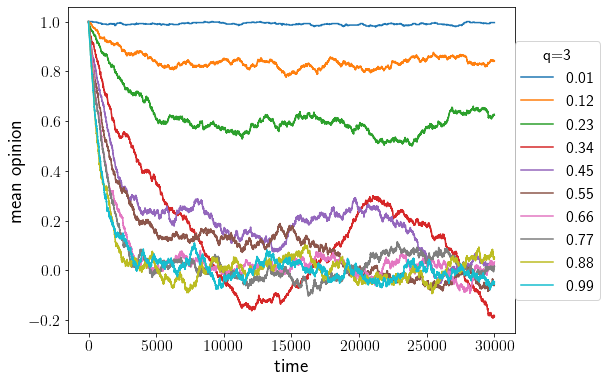

In [119]:
for k, v in res3.items():
    plt.plot(v, label=round(k, 2))
    
plt.legend(loc=(1, 0.1), title='q=3')
plt.xlabel('time', fontsize=20)
plt.ylabel('mean opinion', fontsize=20)
plt.show()

In [121]:
res4 = p_q_relations(ps, 4)

  0%|          | 0/10 [00:00<?, ?it/s]

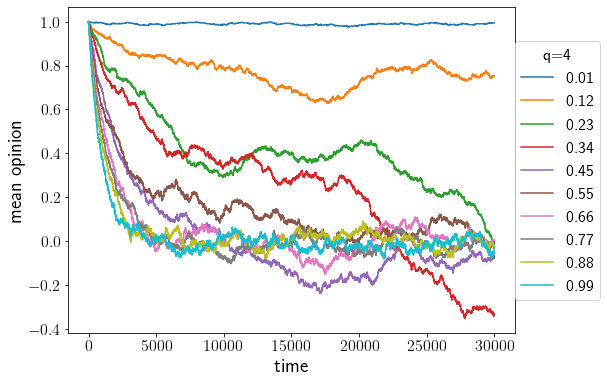

In [122]:
for k, v in res4.items():
    plt.plot(v, label=round(k, 2))
    
plt.legend(loc=(1, 0.1), title='q=4')
plt.xlabel('time', fontsize=20)
plt.ylabel('mean opinion', fontsize=20)
plt.show()

In [123]:
res5 = p_q_relations(ps, 5)

  0%|          | 0/10 [00:00<?, ?it/s]

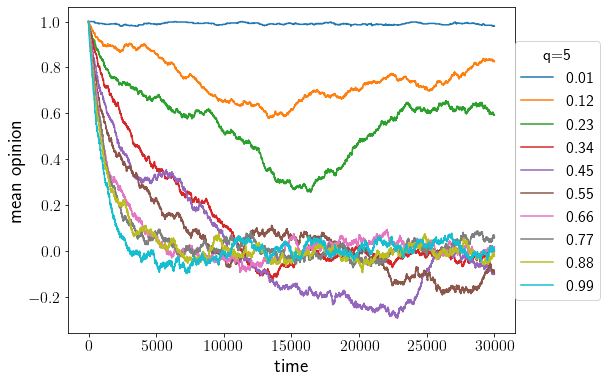

In [124]:
for k, v in res5.items():
    plt.plot(v, label=round(k, 2))
    
plt.legend(loc=(1, 0.1), title='q=5')
plt.xlabel('time', fontsize=20)
plt.ylabel('mean opinion', fontsize=20)
plt.show()

In [125]:
%%time

ps = np.linspace(0.01, 0.99, num=50)
res3_large = p_q_relations(ps, 3) 

  0%|          | 0/50 [00:00<?, ?it/s]

CPU times: user 34min 15s, sys: 6.01 s, total: 34min 21s
Wall time: 33min 37s


No handles with labels found to put in legend.


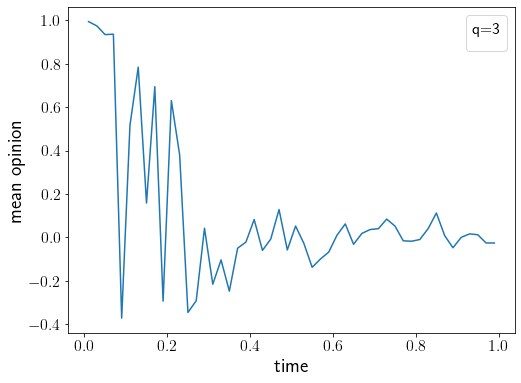

In [128]:

last_val = []
for k, v in res3_large.items():
    last_val.append(v[-1])
    
plt.plot(res3_large.keys(), last_val)

plt.legend(title='q=3')
plt.xlabel('time', fontsize=20)
plt.ylabel('mean opinion', fontsize=20)
plt.show()

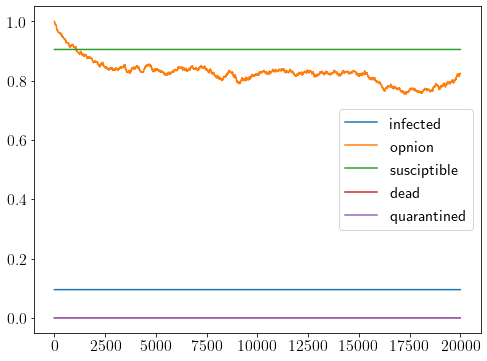

In [100]:
plt.plot(out['infected_ratio'], label='infected')
plt.plot(out['mean_opinion'], label='opnion')
plt.plot(out['susceptible_ratio'], label='susciptible')
plt.plot(out['dead_ratio'], label='dead')
plt.plot(out['quarantined_ratio'], label='quarantined')
plt.legend()


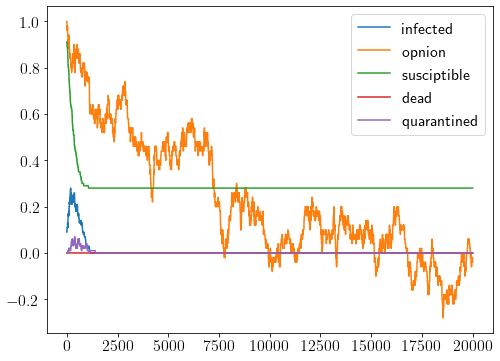

In [96]:
plt.plot(out['infected_ratio'], label='infected')
plt.plot(out['mean_opinion'], label='opnion')
plt.plot(out['susceptible_ratio'], label='susciptible')
plt.plot(out['dead_ratio'], label='dead')
plt.plot(out['quarantined_ratio'], label='quarantined')
plt.legend()
